In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#30→可以改成随机数生成

arrivingtime = np.random.poisson(lam=1,size = 30)
arrivingtime.sort()
workingtime = np.random.poisson(lam=3.3,size = 30)

In [4]:
#只有一个检测点
startingtime = [0 for i in range(30)]
finishtime = [0 for i in range(30)]
waitingtime = [0 for i in range(30)]
emptytime = [0 for i in range(30)]

# 第一个人到达即开始
startingtime[0] = arrivingtime[0]  # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + workingtime[0]   # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0]-arrivingtime[0]   # 第一个人不用等待

arerage waiting time is 49.900000


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-1 ')

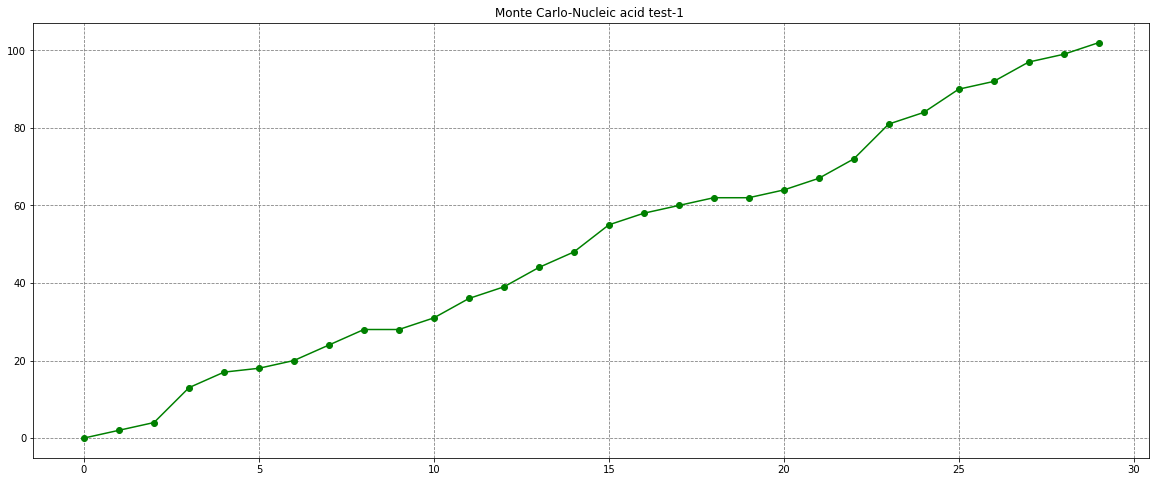

In [7]:
for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
print('arerage waiting time is %f' %np.mean(waitingtime))

fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-1 ')

Average waiting time： 18.933333333333334


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-2 ')

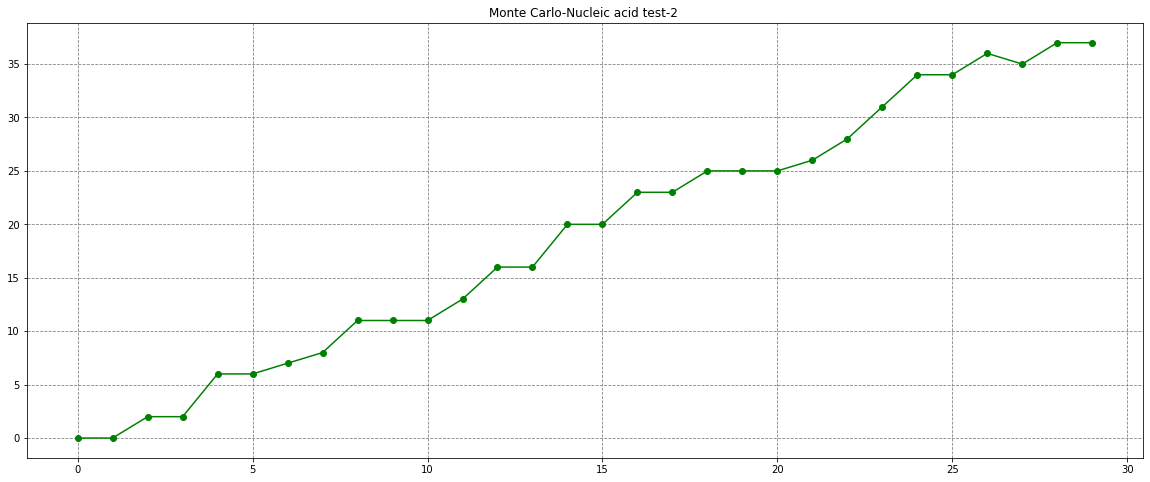

In [8]:
#又引入了一个检测点 需要考虑前两个人的情况
startingtime[1] = arrivingtime[1]
finishtime[1] = startingtime[1] + workingtime[1] 
waitingtime[1] = startingtime[1] - arrivingtime[1]

for i in range(2,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i]:
        startingtime[i] = min(finishtime[i-1],finishtime[i-2])
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - min(finishtime[i-1],finishtime[i-2])
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
print('Average waiting time：', np.mean(waitingtime))

fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-2 ')

Average waiting time： 4.2


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-3 ')

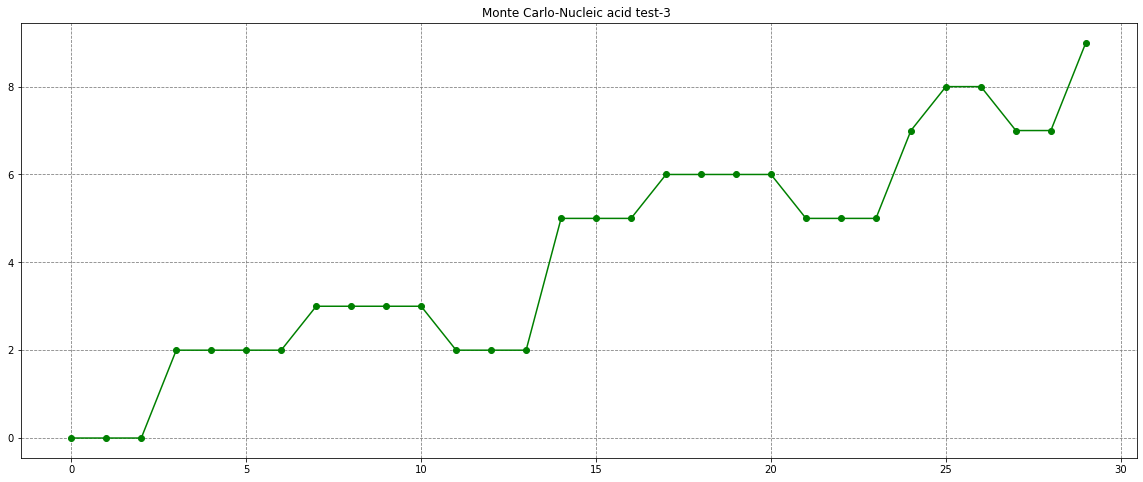

In [9]:
#增加到三个监测点
#需要考虑前三个人的情况
startingtime[2] = arrivingtime[2]
finishtime[2] = startingtime[2] + workingtime[2] 
waitingtime[2] = startingtime[2] - arrivingtime[2]

for i in range(3,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i] and finishtime[i-3] > arrivingtime[i] and finishtime[i-4] > arrivingtime[i] and finishtime[i-5] > arrivingtime[i]:
        startingtime[i] = min(finishtime[i-1],finishtime[i-2],finishtime[i-3],finishtime[i-4],finishtime[i-5])
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - min(finishtime[i-1],finishtime[i-2],finishtime[i-3],finishtime[i-4],finishtime[i-5])
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
print('Average waiting time：', np.mean(waitingtime))


fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-3 ')